## DETERMINING CONTINENT BY LOOKING LIFE EXPECTANCIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### DATA
We want to determine the continent by looking other features. 'Continent' is our label.

In [3]:
df = pd.read_csv('DATA/Life_expectancy_dataset.csv', encoding='utf-8')
df.head()

,Rank,Country,Overall Life,Male Life,Female Life,Continent
0,1,Monaco,89.5,85.6,93.5,Europe
1,2,Japan,85.0,81.7,88.5,Asia
2,3,Singapore,85.0,82.3,87.8,Asia
3,4,Macau; China,84.5,81.6,87.6,Asia
4,5,San Marino,83.3,80.7,86.1,Europe


<AxesSubplot: xlabel='Continent', ylabel='count'>

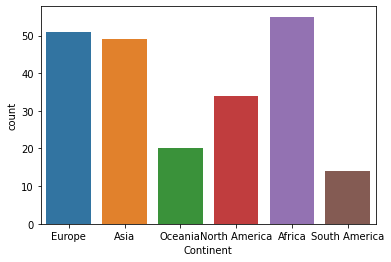

In [4]:
sns.countplot(data=df, x='Continent')

##### Since we want to determine continent we should drop 'Country' feature

In [5]:
df.drop(['Country'], axis=1, inplace=True)

#### The correlation between features

<AxesSubplot: >

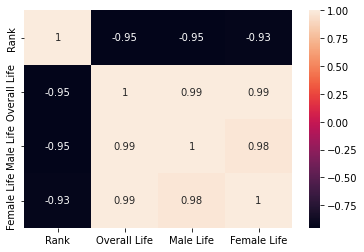

In [6]:
sns.heatmap(data=df.drop('Continent', axis=1).corr(), annot=True)

## PREPARATIONS BEFORE TRAINING

##### TRAIN TEST SPLİT

In [7]:
X= df.drop('Continent', axis=1)
y = df['Continent']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#### PREPARING PIPELINE

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
scaler = StandardScaler()
knn = KNeighborsClassifier()

operations = [('scaler', scaler), ('knn', knn)]

from sklearn.pipeline import Pipeline
pipe = Pipeline(operations)

#### GRID SEARCH

In [9]:
grid_param = {'knn__n_neighbors': list(range(1,30))}
from sklearn.model_selection import GridSearchCV
model = GridSearchCV(pipe, grid_param, cv=5, scoring='accuracy')
model.fit(X_train, y_train)

print("best K value: " , model.best_estimator_.get_params()['knn__n_neighbors'])

best K value:  16


Text(0, 0.5, 'Accuracy')

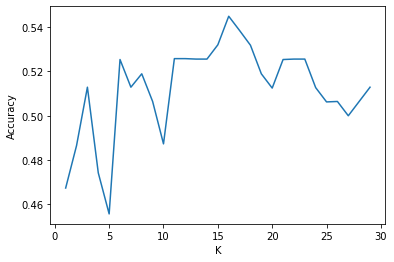

In [10]:
sns.lineplot(x=range(1,30), y=model.cv_results_['mean_test_score'])
plt.xlabel('K')
plt.ylabel('Accuracy')

#### PERFORMANCE EVALUATION

In [11]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import classification_report


##### TRAIN DATA

In [12]:
train_y_hat = model.predict(X_train)
print(classification_report(y_train, train_y_hat))

               precision    recall  f1-score   support

       Africa       0.83      0.85      0.84        40
         Asia       0.44      0.56      0.49        34
       Europe       0.53      0.78      0.63        37
North America       0.24      0.18      0.21        22
      Oceania       0.00      0.00      0.00        15
South America       0.00      0.00      0.00         8

     accuracy                           0.55       156
    macro avg       0.34      0.40      0.36       156
 weighted avg       0.47      0.55      0.50       156



##### TEST DATA

In [13]:
test_y_hat = model.predict(X_test)
print(classification_report(y_test, test_y_hat))

               precision    recall  f1-score   support

       Africa       0.80      0.80      0.80        15
         Asia       0.56      0.67      0.61        15
       Europe       0.43      0.86      0.57        14
North America       0.33      0.17      0.22        12
      Oceania       0.00      0.00      0.00         5
South America       0.00      0.00      0.00         6

     accuracy                           0.54        67
    macro avg       0.35      0.42      0.37        67
 weighted avg       0.45      0.54      0.47        67

